In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt



In [5]:



file_path = '../data/raw/ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv' #name of file used


df = pd.read_csv(file_path)

df['month'] = pd.to_datetime(df['month'])

df['floor_area_sqm'] = pd.to_numeric(df['floor_area_sqm'], errors = 'coerce') 



df['treatment_group'] =df['flat_type'].isin(['5 ROOM', 'EXECUTIVE']).astype(int) 


df['price_psf'] = df['resale_price'] / (df['floor_area_sqm'] * 10.764) # 1 sqm = 10.764 sqft

df['price_psf_rounded'] = df['price_psf'].round(2)

df['post_policy'] = (df['month'] >= '2013-01').astype(int) #The brackets and all that were critical over here





display(df)








,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,treatment_group,price_psf,price_psf_rounded,post_policy
0,2012-03-01,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0,0,516.123705,516.12,0
1,2012-03-01,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0,0,559.525016,559.53,0
2,2012-03-01,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0,0,430.356089,430.36,0
3,2012-03-01,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0,0,443.712319,443.71,0
4,2012-03-01,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0,0,445.098920,445.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52198,2014-12-01,YISHUN,5 ROOM,816,YISHUN ST 81,10 TO 12,122.0,Improved,1988,580000.0,1,441.666514,441.67,1
52199,2014-12-01,YISHUN,EXECUTIVE,325,YISHUN CTRL,10 TO 12,146.0,Maisonette,1988,540000.0,1,343.611124,343.61,1
52200,2014-12-01,YISHUN,EXECUTIVE,618,YISHUN RING RD,07 TO 09,164.0,Apartment,1992,738000.0,1,418.060201,418.06,1
52201,2014-12-01,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,152.0,Maisonette,1985,592000.0,1,361.829881,361.83,1


In [6]:
%matplotlib inline
time_series = df.groupby(['month', 'treatment_group'])['price_psf'].mean().reset_index()

treatment_data = time_series[time_series['treatment_group'] ==1]
control_data = time_series[time_series['treatment_group'] ==0]


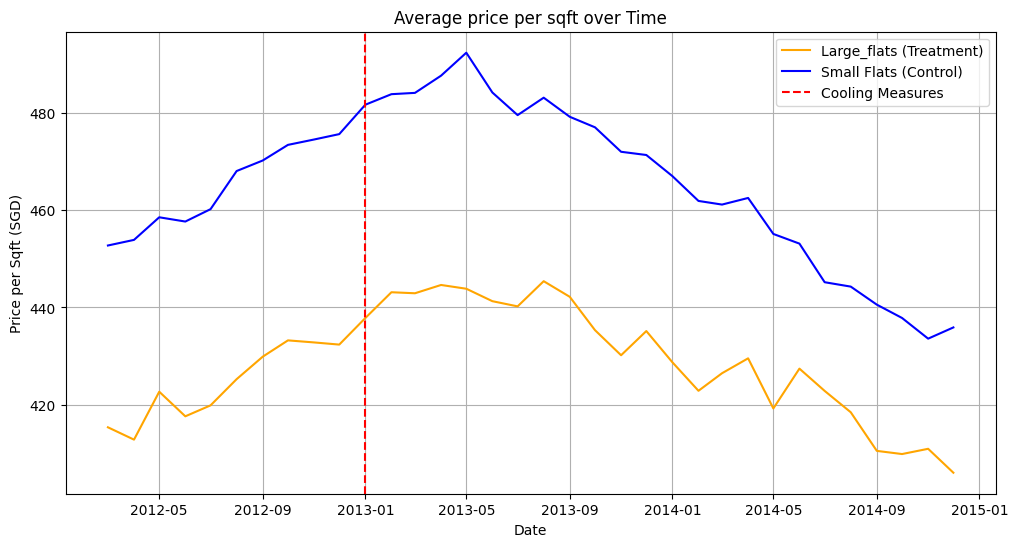

In [7]:
plt.figure(figsize = (12,6))
plt.plot(treatment_data['month'], treatment_data['price_psf'], label = 'Large_flats (Treatment)', color = 'orange')
plt.plot(control_data['month'], control_data['price_psf'], label = 'Small Flats (Control)', color = 'blue')
plt.axvline(pd.Timestamp('2013-01'), color='red', linestyle='--', label='Cooling Measures')
plt.title('Average price per sqft over Time')
plt.xlabel('Date')
plt.ylabel('Price per Sqft (SGD)')
plt.legend()
plt.grid(True)
plt.show()
                         


In [8]:
import statsmodels.formula.api as smf

#Dependent variable: price_psf
#Independent variables: post_policy, treatment_group
#Interaction term/DID estimator: (post_policy * treatment_group)

model = smf.ols(formula = 'price_psf ~ post_policy + treatment_group + (post_policy *treatment_group)' , data = df).fit() 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              price_psf   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     770.5
Date:                Thu, 11 Sep 2025   Prob (F-statistic):               0.00
Time:                        21:27:11   Log-Likelihood:            -3.0422e+05
No. Observations:               52203   AIC:                         6.084e+05
Df Residuals:                   52199   BIC:                         6.085e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         